### Импорт библиотек и настройка визулизации

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import joblib

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

### Загрузка и первичный анализ данных

In [16]:
df = pd.read_csv("Churn_Modelling.csv")

print(f"размер датасета: {df.shape[0]} строк, {df.shape[1]} колонок")
df.head()

размер датасета: 10000 строк, 14 колонок


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### EDA

C:\Users\Admin\AppData\Local\Temp\ipykernel_12604\531460948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='Set2')


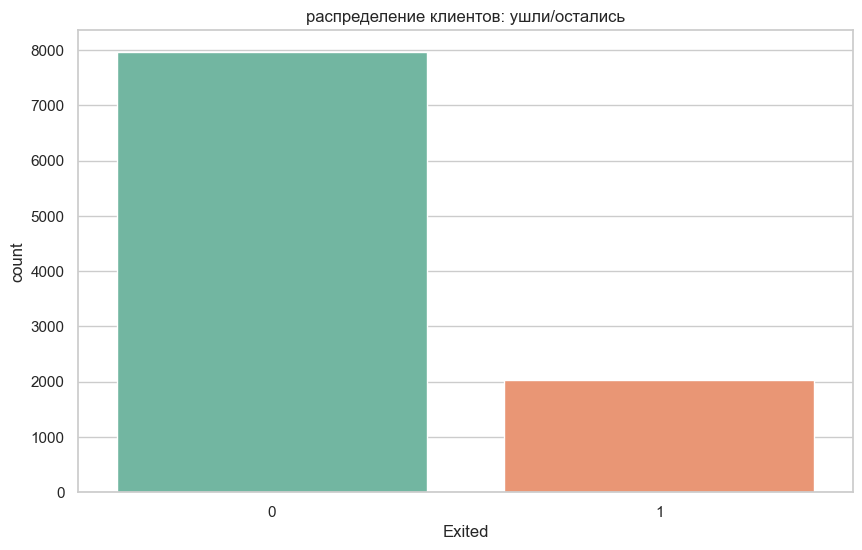

In [20]:
df['Exited'].value_counts(normalize=True)
sns.countplot(x='Exited', data=df, palette='Set2')
plt.title('распределение клиентов: ушли/остались')
plt.show()

**Распределение числовых признаков**

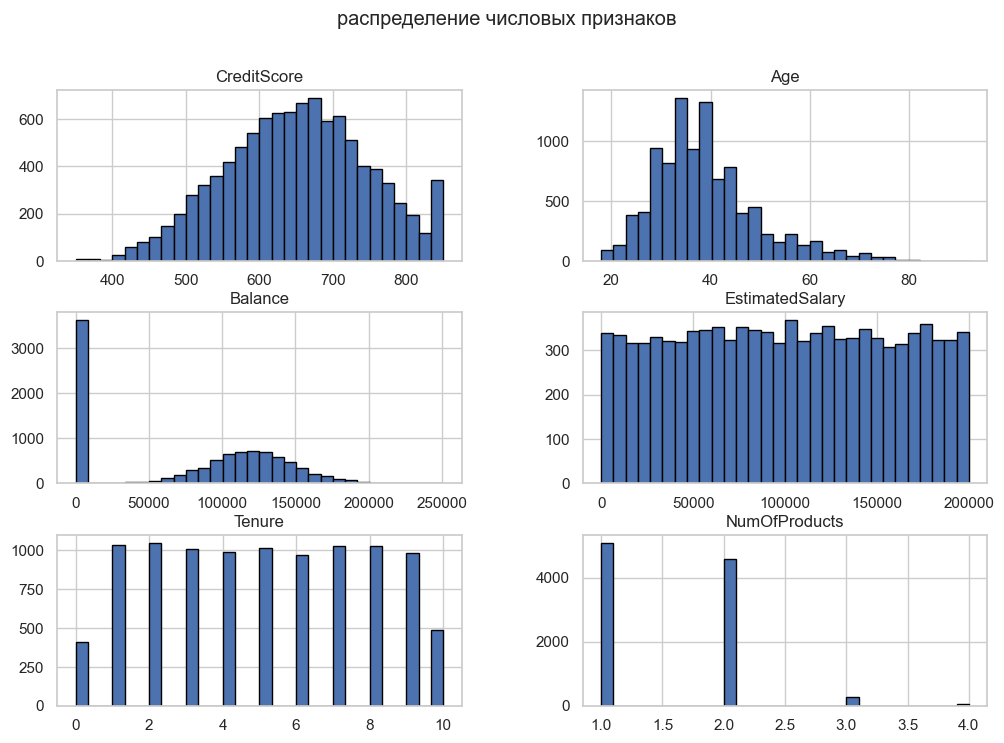

In [21]:
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

df[numerical_cols].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle('распределение числовых признаков')
plt.show()

**Корреляции**

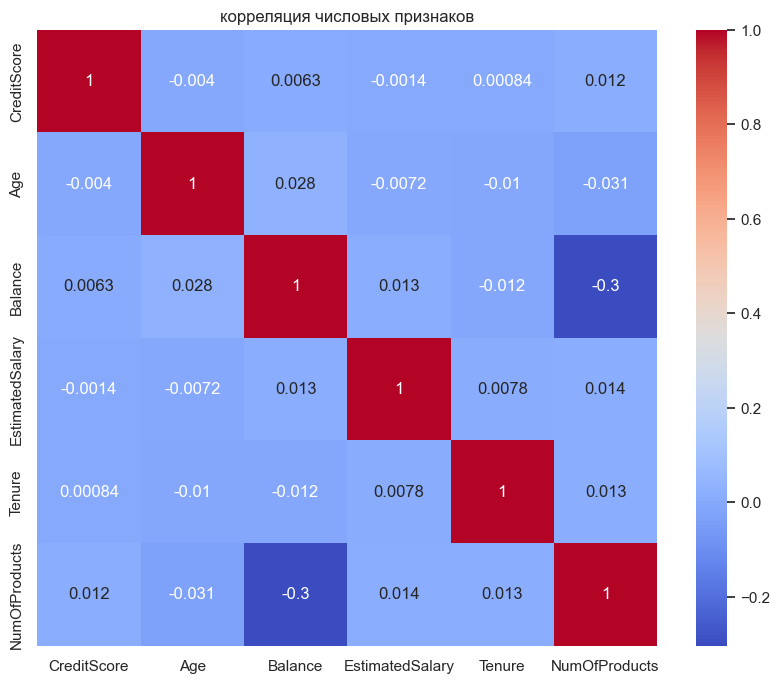

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('корреляция числовых признаков')
plt.show()

**Категориальные признаки**

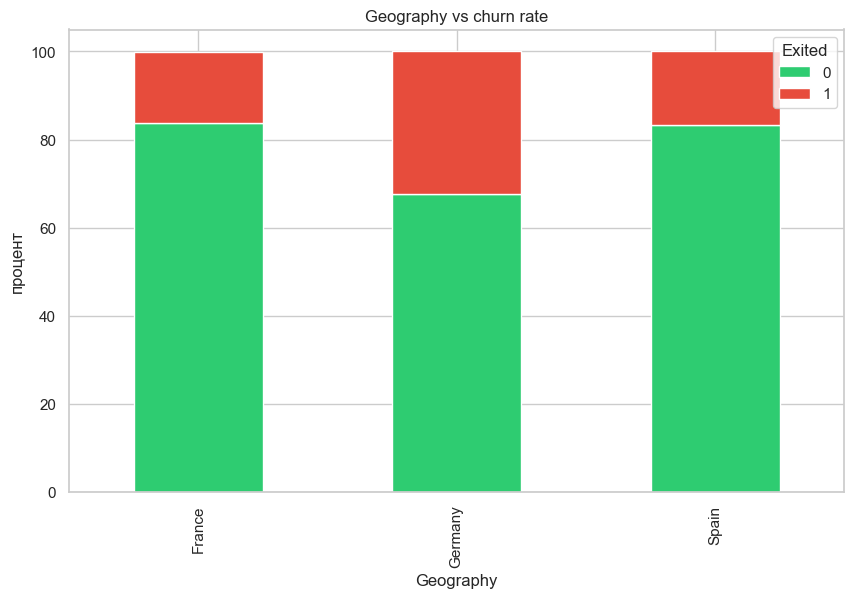

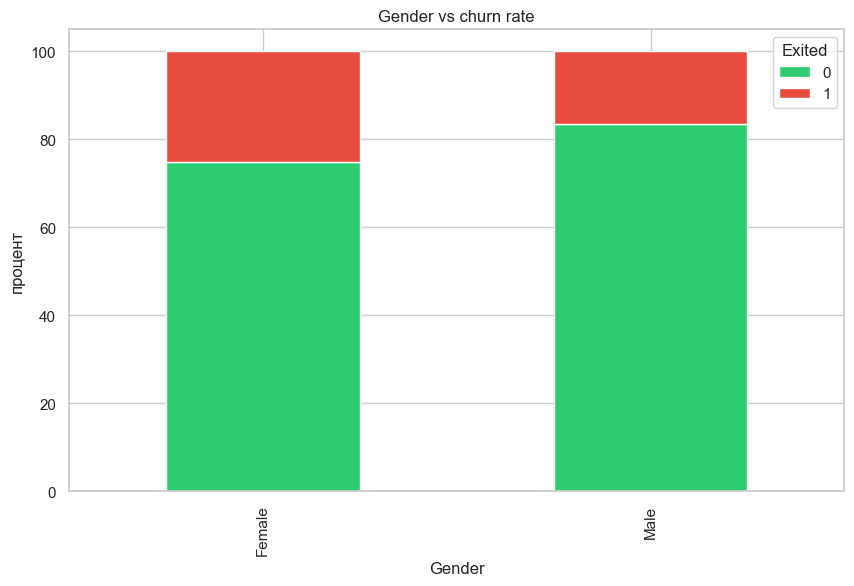

In [23]:
categorical_cols = ['Geography', 'Gender']

for col in categorical_cols:
    churn_rate = pd.crosstab(df[col], df['Exited'], normalize='index') * 100
    churn_rate.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'])
    plt.title(f'{col} vs churn rate')
    plt.ylabel('процент')
    plt.show()

**Boxplots числовых признаков vs churn**

C:\Users\Admin\AppData\Local\Temp\ipykernel_12604\2106146007.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, ax=axes[i], palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12604\2106146007.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, ax=axes[i], palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12604\2106146007.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, ax=axes[i], palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipyker

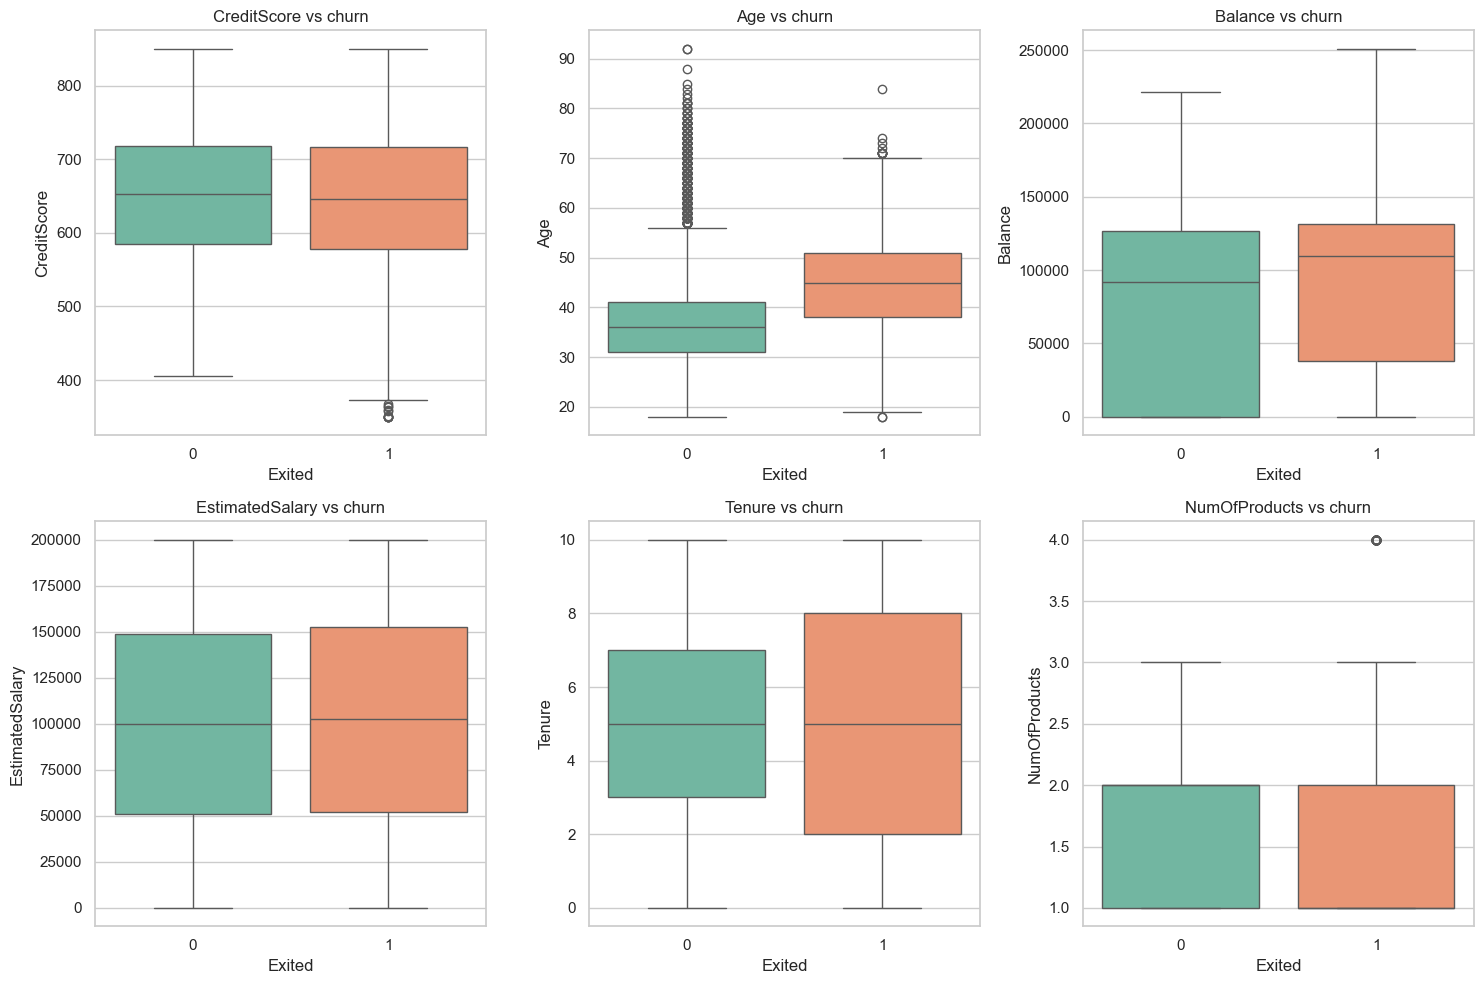

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Exited', y=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} vs churn')

plt.tight_layout()
plt.show()

**Дополнительный анализ активности**

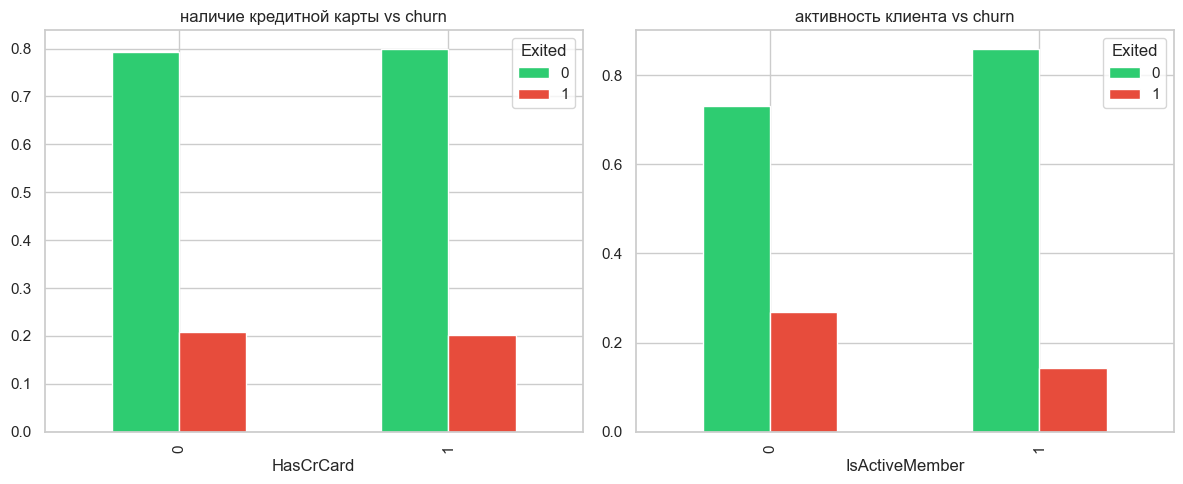

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

pd.crosstab(df['HasCrCard'], df['Exited'], normalize='index').plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('наличие кредитной карты vs churn')

pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index').plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('активность клиента vs churn')

plt.tight_layout()
plt.show()

### Предобработка данных

In [26]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df = pd.get_dummies(df, drop_first=True)

X = df.drop('Exited', axis=1)
y = df['Exited']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### train/test split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("train:", X_train.shape, "test:", X_test.shape)

train: (8000, 11) test: (2000, 11)


### Обучение моделей


обучение модели: RandomForest
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

roc-auc: 0.8526662255475814


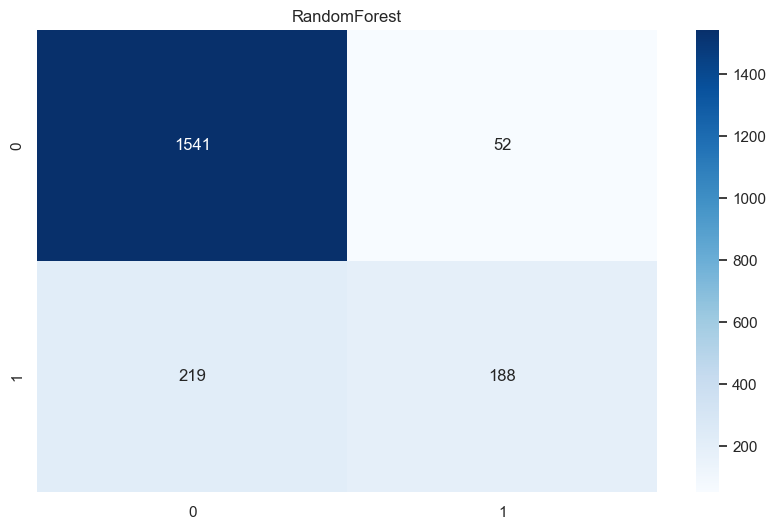


обучение модели: GradientBoosting
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

roc-auc: 0.8708307691358538


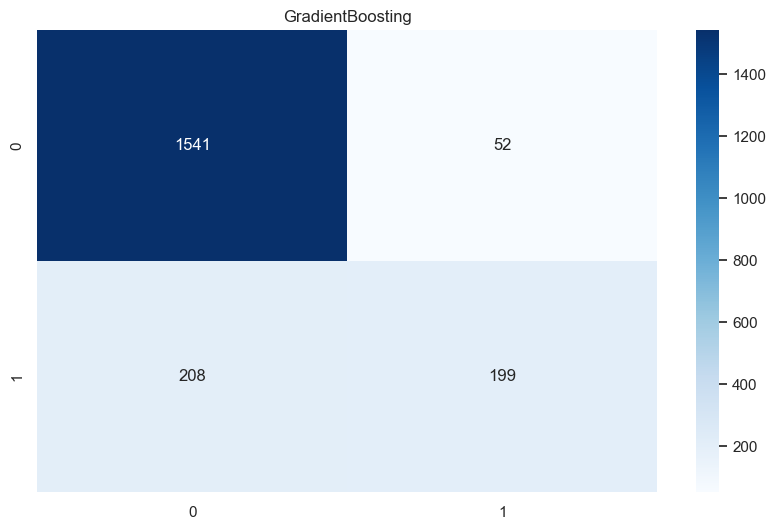


обучение модели: LogisticRegression
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

roc-auc: 0.7747686052770799


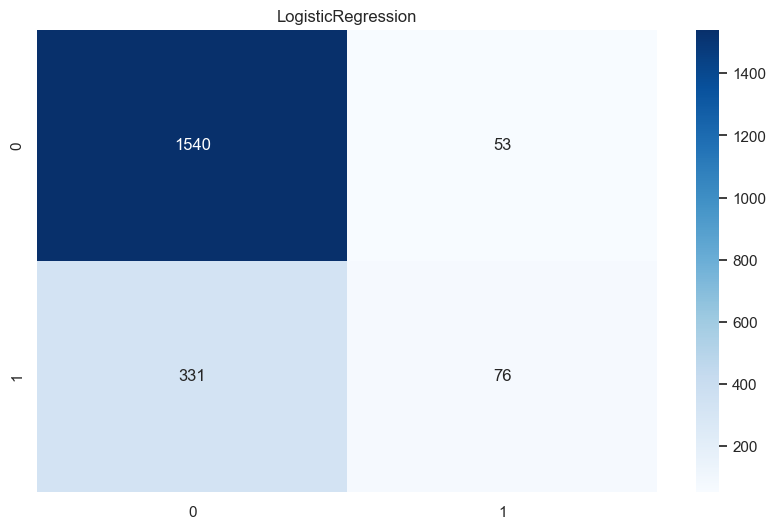

In [28]:
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42, learning_rate=0.1),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
}

results = {}

for name, model in models.items():
    print(f"\nобучение модели: {name}")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print(classification_report(y_test, y_pred))
    print("roc-auc:", roc_auc_score(y_test, y_prob))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(name)
    plt.show()
    
    results[name] = {'model': model, 'y_prob': y_prob}

### Сравнение моделей

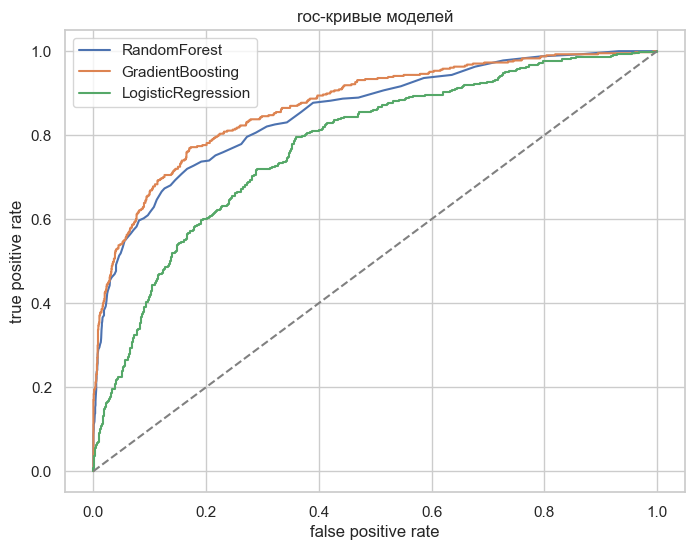

In [29]:
plt.figure(figsize=(8,6))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1],[0,1],'--', color='gray')
plt.title('roc-кривые моделей')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

### Важность признаков

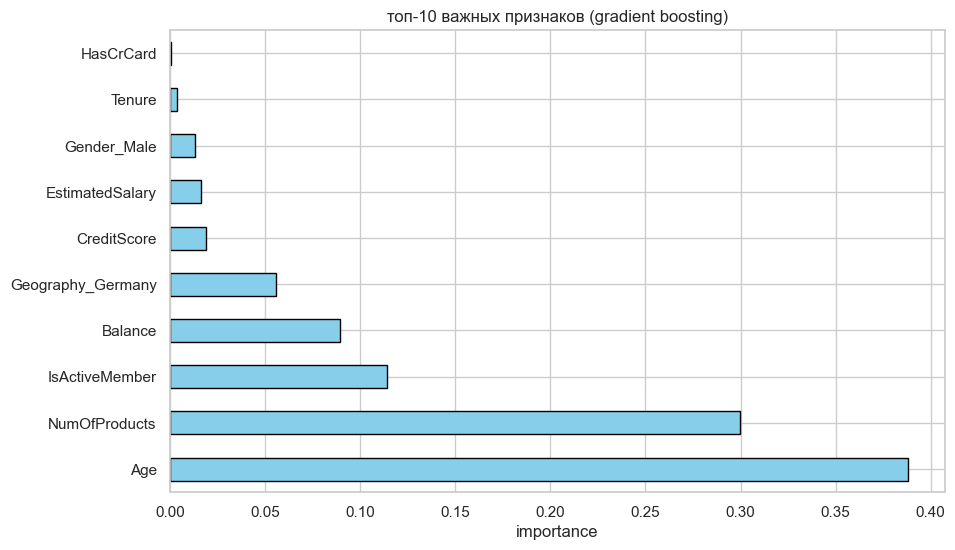

In [30]:
best_model = results['GradientBoosting']['model']
feat_imp = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]

feat_imp.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('топ-10 важных признаков (gradient boosting)')
plt.xlabel('importance')
plt.show()

### Кросс-валидация

In [31]:
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='f1')
print("f1-score по фолдам:", cv_scores)
print("средний f1:", cv_scores.mean().round(4))

f1-score по фолдам: [0.57722309 0.6097561  0.57185629 0.61812779 0.56661562]
средний f1: 0.5887
